In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

In [43]:
train = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/train.csv')

In [44]:
train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


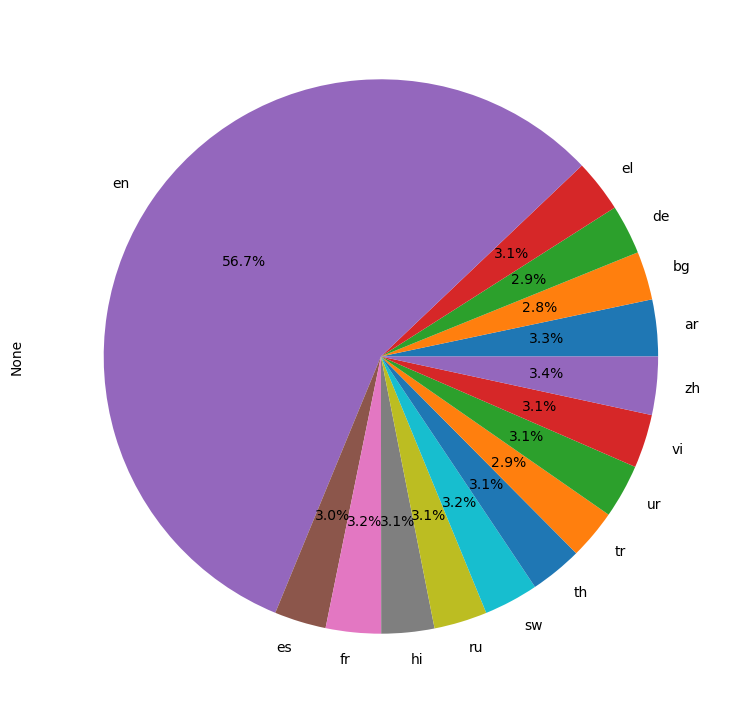

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
train.groupby('lang_abv').size().plot(kind='pie', autopct='%1.1f%%')
plt.show()

# Load the model **xlm-roberta-large-xnli**

In [46]:
from transformers import BertTokenizer, TFBertModel, TFAutoModel,AutoTokenizer
model_name ='joeddav/xlm-roberta-large-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [47]:
def encode_premise_sentence(s):
    tokens=[]
    tokens.append('[CLS]')
    tokens+=list(tokenizer.tokenize(s))
    return tokenizer.convert_tokens_to_ids(tokens)

In [48]:
encode_premise_sentence("don't drink and drive")

[3, 2301, 25, 18, 23417, 136, 22648]

In [49]:
def encode_hypo_sentence(s):
    tokens=[]
    tokens.append('[sep]')
    tokens+=list(tokenizer.tokenize(s))
    tokens.append('[sep]')
    return tokenizer.convert_tokens_to_ids(tokens)

In [50]:
encode_hypo_sentence("don't drink and drive")

[3, 2301, 25, 18, 23417, 136, 22648, 3]

In [51]:
tokenized=[]
for i in range(len(train)):
    pre=encode_premise_sentence(train['premise'][i])
    hyp=encode_hypo_sentence(train['hypothesis'][i])
    tokenized.append(pre+hyp)
train['tokenized']=tokenized
train.head()

,id,premise,hypothesis,lang_abv,language,label,tokenized
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0,"[3, 136, 6097, 24626, 3542, 90698, 23, 26168, ..."
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2,"[3, 32255, 621, 37348, 450, 642, 148, 56644, 1..."
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0,"[3, 5581, 69332, 37899, 3739, 91362, 9, 16161,..."
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0,"[3, 398, 3714, 1836, 831, 25, 18, 6183, 65922,..."
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,"[3, 6976, 114538, 171936, 18379, 101830, 14435..."


In [52]:
tokenized=[]
for i in range(len(train)):
    pre=encode_premise_sentence(train['premise'][i])
    hyp=encode_hypo_sentence(train['hypothesis'][i])
    tokenized.append(pre+hyp)
train['tokenized']=tokenized
train.head()

,id,premise,hypothesis,lang_abv,language,label,tokenized
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0,"[3, 136, 6097, 24626, 3542, 90698, 23, 26168, ..."
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2,"[3, 32255, 621, 37348, 450, 642, 148, 56644, 1..."
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0,"[3, 5581, 69332, 37899, 3739, 91362, 9, 16161,..."
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0,"[3, 398, 3714, 1836, 831, 25, 18, 6183, 65922,..."
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,"[3, 6976, 114538, 171936, 18379, 101830, 14435..."


In [53]:
mask=[]
for i in range(len(train)):
    padded_seq=tokenizer(train['premise'][i],train['hypothesis'][i], padding=True,add_special_tokens = True)
    mask.append(padded_seq)

In [54]:
train['masked'] = mask
train.head(5)

,id,premise,hypothesis,lang_abv,language,label,tokenized,masked
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0,"[3, 136, 6097, 24626, 3542, 90698, 23, 26168, ...","[input_ids, attention_mask]"
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2,"[3, 32255, 621, 37348, 450, 642, 148, 56644, 1...","[input_ids, attention_mask]"
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0,"[3, 5581, 69332, 37899, 3739, 91362, 9, 16161,...","[input_ids, attention_mask]"
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0,"[3, 398, 3714, 1836, 831, 25, 18, 6183, 65922,...","[input_ids, attention_mask]"
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1,"[3, 6976, 114538, 171936, 18379, 101830, 14435...","[input_ids, attention_mask]"


We specify the maximum length of the input.

In [55]:
l = [len(x) for x in train['premise']]
len([r for r in l if r>256])/len(l)

0.02698019801980198

We see that only 2.7% of the tokenized permises have length > 256. So we can safly set the max length max_len to 256, without any major loss of information.

In [56]:
max_len = 256 

def build_model():
    encoder = TFAutoModel.from_pretrained('joeddav/xlm-roberta-large-xnli')
  
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")  
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    # The following line passes the input word IDs and mask through the 
    # XLM-RoBERTa encoder to obtain a dense embedding of the input sequence.
    #embedding = encoder([input_word_ids, input_mask])[0] 
    embedding = encoder(input_word_ids, input_mask)[0] 
    output = tf.keras.layers.Dense(3, activation='softmax')(embedding[:,0,:])
    model = tf.keras.Model(inputs=[input_word_ids, input_mask], outputs=output) 
    # This line compiles the Keras model, specifying the Adam optimizer with a learning rate of 1e-5, 
    # the loss function to be sparse_categorical_crossentropy, and accuracy as the evaluation metric.
    model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
    
    return model

In [57]:
input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")  
input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")

In [58]:
def input_convert(data):
    inputs={
        'input_word_ids':[],
        'input_mask':[]
    }
    for each in data:
        inputs['input_word_ids'].append(each['input_ids'])
        inputs['input_mask'].append(each['attention_mask'])
        
    inputs['input_word_ids']= tf.ragged.constant( inputs['input_word_ids']).to_tensor(shape=[input_word_ids.shape[0], 256])
    inputs['input_mask']= tf.ragged.constant( inputs['input_mask']).to_tensor(shape=[input_mask.shape[0], 256])
    return inputs

In [59]:
train_input=input_convert(train['masked'].values)
for key in train_input.keys():
    train_input[key] = train_input[key][:,:max_len]

In [60]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

In [61]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
  tpu = None
  gpus = tf.config.experimental.list_logical_devices("GPU")

if tpu:
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu,)  
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
  strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
  print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
  strategy = tf.distribute.get_strategy() 
  print('Running on single GPU ', gpus[0].name)
else:
  strategy = tf.distribute.get_strategy() 
  print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.0.0.2:8470']
Number of accelerators:  8


In [62]:
with strategy.scope(): 
    model = build_model() 
    model.summary()      

Some layers from the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing TFXLMRobertaModel: ['classifier']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at joeddav/xlm-roberta-large-xnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 256)]        0           []                               
                                                                                                  
 tfxlm_roberta_model_2 (TFXLMRo  TFBaseModelOutputWi  559890432  ['input_word_ids[0][0]',         
 bertaModel)                    thPoolingAndCrossAt               'input_mask[0][0]']             
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                         

In [63]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.fit(train_input, train['label'].values, epochs = 6, verbose = 1, validation_split = 0.01,
         batch_size=16*strategy.num_replicas_in_sync
          ,callbacks=[early_stop]
         ) 

Epoch 1/4


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:453: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256002048 elements. This may consume a large amount of memory.
  num_elements)


94/94 [==============================] - 291s 2s/step - loss: 0.2720 - accuracy: 0.9018 - val_loss: 0.2113 - val_accuracy: 0.9344
Epoch 2/4
94/94 [==============================] - 39s 419ms/step - loss: 0.1498 - accuracy: 0.9486 - val_loss: 0.2209 - val_accuracy: 0.9426
Epoch 3/4
94/94 [==============================] - 39s 419ms/step - loss: 0.0927 - accuracy: 0.9707 - val_loss: 0.2495 - val_accuracy: 0.9426
Epoch 4/4
94/94 [==============================] - 68s 727ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.2603 - val_accuracy: 0.9426


In [64]:
test = pd.read_csv("../input/contradictory-my-dear-watson/test.csv")

In [65]:
test.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [66]:
tokenized=[]
for i in range(len(test)):
    pre=encode_premise_sentence(test['premise'][i])
    hyp=encode_hypo_sentence(test['hypothesis'][i])
    tokenized.append(pre+hyp)
test['tokenized']=tokenized


mask=[]
for i in range(len(test)):
    padded_seq=tokenizer(test['premise'][i],test['hypothesis'][i], padding=True,add_special_tokens = True)
    mask.append(padded_seq)
    
test['masked'] = mask

test_input=input_convert(test['masked'].values)
for key in test_input.keys():
    test_input[key] = test_input[key][:,:max_len]


In [67]:
predictions = [np.argmax(i) for i in model.predict(test_input)] 

163/163 [==============================] - 31s 147ms/step


In [68]:
submission = test.id.copy().to_frame()
submission['prediction'] = predictions

In [69]:
submission.to_csv("submission.csv", index = False)